## Gathering Data

I imported and aliased the necessary packages.

In [79]:
import pandas as pd
import numpy as np
import requests as req
import tweepy
import json
import matplotlib

### I. df_enhanced dataset

In [76]:
df_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [77]:
df_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [73]:
df_enhanced.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


### II. image_predictions Dataset

In [82]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = req.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_predictions = pd.read_csv('image-predictions.tsv', sep='\t' )

I checked the content type and separator.

In [6]:
r.headers['content-type']

'text/tab-separated-values; charset=utf-8'

In [83]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


### III. df_tweets Dataset

In [20]:
# Twitter API for more data (save to local file)

consumer_key = 'NSKiwP48naqW60uLMSagWsH9Y'
consumer_secret = 'HU9Wm1jitLhRoBAmJIRoU2fqr4INsNoIaGDrX9Yv7d7XpYJYAs'
access_token = '728609958690967552-byqKe8TJYh7Q7nf52XhKHZpv7NKI2fT'
access_secret = 'u9zIhOOO6egDIsI9MdsS8ydZ13GiZrcRv4dGD8xRBctpk'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

Create a list of tweet ids to iterate through it.

In [21]:
id_list = df_enhanced['tweet_id']

In [40]:
# test to figure out how we can access and populate the needed attributes 
single_tweet = api.get_status(df_enhanced.tweet_id.iloc[0], tweet_mode='extended')
# Tweet ID 
print('Tweet ID: {}'.format(single_tweet.id_str))
# Retweet count 
print('Retweet Count: {}'.format(single_tweet.retweet_count))
# Favourite Count
print('Favourite Count: {}'.format(single_tweet.favorite_count))

Tweet ID: 892420643555336193
Retweet Count: 8148
Favourite Count: 37454


Source: https://stackoverflow.com/questions/34379168/how-to-save-the-tweets-in-json-to-txt-file-in-python-3-4

In [44]:
# creating a list for the exceptions
exceptions_list = []

# opening the file to write
with open('tweet-json.txt', 'w', encoding = 'utf-8') as f:
    for id_tweet in id_list: 
        try:
            tweet = api.get_status(id_tweet, tweet_mode= 'extended')
            json.dump(tweet._json, f)
# writing the content witt new paragraphs
            f.write("\n")
        except Exception as e:
            exceptions_list.append(id_tweet)
# printing out the exception messages
#            print(str(e))


In [46]:
# Reading the json file

df_full_json = pd.read_json('tweet-json.txt', orient='records', lines = True)

In [47]:
# Checking the columns to find out which values we would like to extract.

df_full_json.columns

Index(['contributors', 'coordinates', 'created_at', 'display_text_range',
       'entities', 'extended_entities', 'favorite_count', 'favorited',
       'full_text', 'geo', 'id', 'id_str', 'in_reply_to_screen_name',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str', 'is_quote_status',
       'lang', 'place', 'possibly_sensitive', 'possibly_sensitive_appealable',
       'quoted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status_permalink', 'retweet_count', 'retweeted',
       'retweeted_status', 'source', 'truncated', 'user'],
      dtype='object')

In [84]:
# As I should exclude retweets, I also want to know a tweet's retweet status.

df_tweets = df_full_json[['id','favorite_count', 'retweet_count', 'retweeted']]

In [85]:
df_tweets.head()

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37454,8148,False
1,892177421306343426,32190,6034,False
2,891815181378084864,24268,3993,False
3,891689557279858688,40759,8309,False
4,891327558926688256,38993,9001,False


In [86]:
df_tweets.tail()

,id,favorite_count,retweet_count,retweeted
774,773670353721753600,5566,1387,False
775,773547596996571136,23119,6586,False
776,773336787167145985,0,5428,False
777,773308824254029826,24343,7959,False
778,773247561583001600,9856,3444,False


## Assesing Data

### I. df_enhanced dataset

In [54]:
df_enhanced.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None


In [55]:
df_enhanced.count()

tweet_id                      2356
in_reply_to_status_id           78
in_reply_to_user_id             78
timestamp                     2356
source                        2356
text                          2356
retweeted_status_id            181
retweeted_status_user_id       181
retweeted_status_timestamp     181
expanded_urls                 2297
rating_numerator              2356
rating_denominator            2356
name                          2356
doggo                         2356
floofer                       2356
pupper                        2356
puppo                         2356
dtype: int64

In [56]:
# check for retweets
df_enhanced[df_enhanced.retweeted_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,None,None,pupper,None


In [57]:
df_enhanced[df_enhanced.retweeted_status_id.notnull()]['tweet_id'].count()

181

I counted and grouped the dognames to discover the invalid dog names in the dataset. According to my observations, all the incorrect dog names start with a lower case letter and are detected as name based on the text column.

In [87]:
df_enhanced.groupby('name')['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            5
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           2
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               7
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             4
life             1
light            1
mad              2
my               1
not              2
officially       1
old    

In [88]:
df_enhanced['name'].describe()

count     2356
unique     957
top       None
freq       745
Name: name, dtype: object

Cheking the null values and datatypes.

In [89]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

I ckecked if there are any values duplicated by their id.

In [90]:
df_enhanced[df_enhanced['tweet_id'].duplicated(keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Il. df_tweets dataset

Print out the df_tweets dataset.

In [53]:
df_tweets.head(1)

,id,favorite_count,retweet_count,retweeted
0,892420643555336193,37454,8148,False


I checked the possible retweets in the dataset by counting the retweeted values. There are no any retweeted values.

In [17]:
len(df_tweets.query('retweeted == True'))

0

I checked if there ary any duplicated value by id.

In [18]:
df_tweets[df_tweets['id'].duplicated(keep=False)]

,id,favorite_count,retweet_count,retweeted


In [19]:
df_tweets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2346 entries, 0 to 2345
Data columns (total 4 columns):
id                2346 non-null int64
favorite_count    2346 non-null int64
retweet_count     2346 non-null int64
retweeted         2346 non-null bool
dtypes: bool(1), int64(3)
memory usage: 75.6 KB


After asessing, I can assume, that there are not any particular problem with this dataframe.

### III. image_predictions

In [91]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


I checked the datatypes.

In [26]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


Listing the null values (if there are any).

In [92]:
nulls = image_predictions.columns[image_predictions.isnull().any()]
image_predictions[nulls].isnull().sum()

Series([], dtype: float64)

## Summary

#### Tidiness:
   
- there are 3 dataset instead of 1 master dataset
- data seems to be in 1:1 relationship to each other, hence the data frames can be joined
- the 3 data sources have different number of records --> needs to be checked
    
df_enhanced dataset:
    
- unecessary source column with hardly readable information
- unecessary category columns:  doggo, floofer, pupper, puppo 
    
image_predictions dataset:

- no need of infos of some columns: 
- too many stages column instead of one
- stages column could be categorical datatype
    
#### Quality:
    
df_enhanced dataset:
    
- the dog_stage is string datatype
- unecessary rating denominator column, rating numerator column header without scale
- incorrect names, missing names in name column: such?, quite, a, an, the... - all are written with lower case letters
- retweeted records: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp
- missing data in name and stages columns showing as 'None'
- incorrect datatypes: timestamp is string
- in_reply_to_status_id, in_reply_to_user_id should be changed from sciantific float to string
- wrong rating numeratores were extracted from the text column
    
image_predictions dataset:
    
- dog breeds start with lower case letters
- non-dog records in the dataset (eg.: shopping cart, box turtle...)
- the p1, p2, p2 columns shoulf be categorical datatypes
    

## Cleaning Process

### I. df_enhanced Data

#### Define: 
Retweeted records in the dataset: retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp

#### Code: 
deleting all the retweets columns as we only need the original tweets.

I conted the number of retweeted tweets from df_enhanced dataframe.

In [93]:
len(df_enhanced.query('retweeted_status_id != "NaN"'))

181

I created a new dataframe without the retweeted tweets.

In [94]:
df_enhanced = df_enhanced.query('retweeted_status_id == "NaN"')

#### Test: 

Doublechecking the results.

In [95]:
len(df_enhanced.query('retweeted_status_id != "NaN"'))

0

After testing, I dropped the unecessary empty columns.

In [96]:
df_enhanced = df_enhanced.drop(['retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], axis=1)

#### Define: 
Unecessary rating denominator column, rating numerator column header without scale

#### Code:

I dropped the rating denominator column and add a scale to the numerator column in the title.

In [97]:
df_enhanced = df_enhanced.drop('rating_denominator', axis=1)

In [98]:
df_enhanced = df_enhanced.rename(index=str, columns={"rating_numerator": "rating_10_scale"})

#### Test:

In [99]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,Archie,None,None,None,None


#### Define:
correct the numerators in the rating_numerator column (decimals are shown as integers)

#### Code: 
I changed the datatype of the column and I extracted the right numerators of the text column with regex. 
I iterated through the df_enhanced database and changed the wrong values with the extracted data on each corresponding row.

Cleaning the rating_numerator columns, extract the right values from the text column.

In [100]:
# setting the rating_10_scale column to float

df_enhanced['rating_10_scale'] = df_enhanced['rating_10_scale'].astype('float')

In [101]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null float64
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(3), int64(1), object(9)
memory usage: 237.9+ KB


In [102]:
# save values into dataframe where text contains decimals
df_bad_numerator = df_enhanced[df_enhanced.text.str.contains(r"(\d+\.\d*\/\d+)")]

# creating a list to append the extracted values
numerator = []

for item in  df_bad_numerator['text']:
    splitted = item.split('/')
    numerator.append(splitted[0].split()[-1])
print(numerator)

['13.5', '9.75', '11.27', '9.5', '11.26']


C:\Users\Amirat\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [103]:
# save the corresponding tweet_ids into a list
tweet_id_list = df_bad_numerator['tweet_id'].tolist()

for i in range(len(tweet_id_list)):
    # change the numerator in the oroginal dataframe
    df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']] = numerator[i]
    # test: print out the changed values in the original daraframe
    print(df_enhanced.loc[(df_enhanced['tweet_id'] == tweet_id_list[i]), ['rating_10_scale']])

   rating_10_scale
45            13.5
    rating_10_scale
695            9.75
    rating_10_scale
763           11.27
     rating_10_scale
1689             9.5
     rating_10_scale
1712           11.26


In [104]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 317.9+ KB


Checking the number of the missing names.

In [110]:
df_enhanced[['name']].groupby(['name'])['name'].size()

name
Abby             2
Ace              1
Acro             1
Adele            1
Aiden            1
Aja              1
Akumi            1
Al               1
Albert           2
Albus            2
Aldrick          1
Alejandro        1
Alexander        1
Alexanderson     1
Alf              1
Alfie            4
Alfy             1
Alice            2
Amber            1
Ambrose          1
Amy              1
Amélie           1
Anakin           1
Andru            1
Andy             1
Angel            1
Anna             1
Anthony          1
Antony           1
Apollo           1
                ..
Ziva             1
Zoe              1
Zoey             3
Zooey            1
Zuzu             1
a               55
actually         2
all              1
an               6
by               1
getting          2
his              1
incredibly       1
infuriating      1
just             3
life             1
light            1
mad              1
my               1
not              2
officially       1
old    

Looking at the missing values.

In [111]:
df_enhanced[df_enhanced['name'] == "NaN"]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo


In [112]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 317.9+ KB


#### Define:
Incorrect datatypes (timestamp, retweetd_status_id, retweeted_status_user_id, retweeted_status_timestamp)


#### Code:
Changing the incorrect data types:
- timestamp
- retweeted_status_id 
- retweeted_status_user_id 
- retweeted_status_timestamp

In [113]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null object
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: float64(2), int64(1), object(10)
memory usage: 317.9+ KB


In [114]:
df_enhanced.timestamp = pd.to_datetime(df_enhanced.timestamp)

In [115]:
df_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id                 2175 non-null int64
in_reply_to_status_id    78 non-null float64
in_reply_to_user_id      78 non-null float64
timestamp                2175 non-null datetime64[ns]
source                   2175 non-null object
text                     2175 non-null object
expanded_urls            2117 non-null object
rating_10_scale          2175 non-null object
name                     2175 non-null object
doggo                    2175 non-null object
floofer                  2175 non-null object
pupper                   2175 non-null object
puppo                    2175 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 317.9+ KB


According to the following post values with float datatype can not be converted to integer if there are any missing values and NaN data. I did not want to replace the missing values with 0 by using the fillna() function. So, I decided to convert the ids to object and scientific format to simple format. There is not any problem with that as we treat these id values as strings and do not expect to do any numerical operations with them anyway.

https://stackoverflow.com/questions/41550746/error-using-astype-when-nan-exists-in-a-dataframe

I used lambda and map function to convert floats in scientific format to simple string format in case of in_reply_to_status_id and in_reply_to_user_id.

https://stackoverflow.com/questions/41157981/pandas-convert-float-in-scientific-notation-to-string/41158287

In [116]:
df_enhanced['in_reply_to_status_id'] = df_enhanced.in_reply_to_status_id.map(lambda x: '{:.0f}'.format(x))
df_enhanced['in_reply_to_user_id'] = df_enhanced.in_reply_to_user_id.map(lambda x: '{:.0f}'.format(x))

#### Test:

I printed out the not null values.

In [117]:
df_enhanced[df_enhanced['in_reply_to_status_id'] != 'nan']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_10_scale,name,doggo,floofer,pupper,puppo
30,886267009285017600,886266357075128320,2281181600,2017-07-15 16:51:35,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,12,None,None,None,None,None
55,881633300179243008,881607037314052096,47384430,2017-07-02 21:58:53,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,17,None,None,None,None,None
64,879674319642796034,879553827334172672,3105440746,2017-06-27 12:14:36,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,14,None,None,None,None,None
113,870726314365509632,870726202742493184,16487760,2017-06-02 19:38:25,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,10,None,None,None,None,None
148,863427515083354112,863425645568774144,77596200,2017-05-13 16:15:35,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,12,None,None,None,None,None
149,863079547188785154,667152164079423488,4196983835,2017-05-12 17:12:53,"<a href=""http://twitter.com/download/iphone"" r...",Ladies and gentlemen... I found Pipsy. He may ...,https://twitter.com/dog_rates/status/863079547...,14,None,None,None,None,None
179,857214891891077121,857156678055342080,180670967,2017-04-26 12:48:51,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,12,None,None,None,None,None
184,856526610513747968,855818117272018944,4196983835,2017-04-24 15:13:52,"<a href=""http://twitter.com/download/iphone"" r...","THIS IS CHARLIE, MARK. HE DID JUST WANT TO SAY...",https://twitter.com/dog_rates/status/856526610...,14,None,None,None,None,None
186,856288084350160898,856286004109553664,279280991,2017-04-23 23:26:03,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,14,None,None,None,None,None
188,855862651834028034,855861584463351808,194351775,2017-04-22 19:15:32,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,420,None,None,None,None,None


#### Define: 

Unecessary category columns:  doggo, floofer, pupper, puppo

#### Code:

I merged the dog stage columns into one column.

In [119]:
columns_melt = df_enhanced.loc[ :, 'doggo' : 'puppo']
columns_remain = df_enhanced.loc[:, 'tweet_id': 'name']

df_enhanced = pd.melt(df_enhanced, id_vars = columns_remain, value_vars = columns_melt, 
                         var_name = 'stages', value_name = 'dog_stage')

In [120]:
df_enhanced = df_enhanced.drop('stages', axis = 1)

As we can see, there is a lot of duplicated data.

In [121]:
df_enhanced.duplicated(subset = "tweet_id").sum()

6525

I sorted and deleted the duplicate data. I had to keep the last records because the first had None values.

In [122]:
df_enhanced = df_enhanced.sort_values('dog_stage').drop_duplicates('tweet_id', keep = 'last')

#### Test:

Double check the results: print out the lenght and count the duplicate data by id.

In [123]:
len(df_enhanced)

2175

In [124]:
df_enhanced.duplicated(subset = "tweet_id").sum()

0

#### Define:
Source column is not readable

#### Code:

I created a new user_source column based on the source column values.
I dropped the unecessary long source column a create a new column based on the source values.

In [125]:
print(df_enhanced['source'])

2095    <a href="http://twitter.com/download/iphone" r...
2094    <a href="http://twitter.com" rel="nofollow">Tw...
2093    <a href="http://twitter.com" rel="nofollow">Tw...
2092    <a href="http://twitter.com" rel="nofollow">Tw...
2091    <a href="http://twitter.com" rel="nofollow">Tw...
2090    <a href="http://twitter.com" rel="nofollow">Tw...
2089    <a href="http://twitter.com" rel="nofollow">Tw...
2088    <a href="http://twitter.com" rel="nofollow">Tw...
2087    <a href="http://twitter.com" rel="nofollow">Tw...
2086    <a href="http://twitter.com" rel="nofollow">Tw...
2085    <a href="http://twitter.com" rel="nofollow">Tw...
2084    <a href="http://twitter.com" rel="nofollow">Tw...
2083    <a href="http://twitter.com" rel="nofollow">Tw...
2082    <a href="http://twitter.com" rel="nofollow">Tw...
2096    <a href="http://twitter.com/download/iphone" r...
2081    <a href="http://twitter.com" rel="nofollow">Tw...
2079    <a href="http://twitter.com" rel="nofollow">Tw...
2078    <a hre

I extracted the source of the source column.

In [126]:
source = df_enhanced['source']

user_source = []

for item in df_enhanced['source']:
    if item.__contains__("Twitter for iPhone"):
        user_source.append("Twitter for iPhone")
    elif item.__contains__("Twitter Web Client"):
        user_source.append("Twitter Web Client")
    elif item.__contains__('Vine - Make a Scene'):
        user_source.append("Vine")
    elif item.__contains__('TweetDeck'):
        user_source.append("TweetDeck")

Doublecheck if we could capture all the values. The output should be True.

In [127]:
len(user_source) == len(df_enhanced['source'])

True

Append the list to the df_enhanced dataset.

In [128]:
df_enhanced['user_source'] = user_source

#### Test:

In [129]:
df_enhanced['user_source'].head(15)

2095    Twitter for iPhone
2094    Twitter Web Client
2093    Twitter Web Client
2092    Twitter Web Client
2091    Twitter Web Client
2090    Twitter Web Client
2089    Twitter Web Client
2088    Twitter Web Client
2087    Twitter Web Client
2086    Twitter Web Client
2085    Twitter Web Client
2084    Twitter Web Client
2083    Twitter Web Client
2082    Twitter Web Client
2096    Twitter for iPhone
Name: user_source, dtype: object

Drop the unecessary source column.

In [130]:
df_enhanced = df_enhanced.drop(['source'], axis = 1)

Change the datatype from string to categorical - user_source column.

In [131]:
df_enhanced['user_source'] = df_enhanced.user_source.astype('category')

In [132]:
df_enhanced.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,name,dog_stage,user_source
2095,667443425659232256,nan,nan,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,None,None,Twitter for iPhone
2094,667453023279554560,nan,nan,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,None,Twitter Web Client
2093,667455448082227200,nan,nan,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,None,Twitter Web Client


#### Define:

There are 3 dataset instead of 1 master dataset

#### Code:

I merged the df_enhanced and df_tweets dataframe together by id values, using left join.

In [133]:
df_clean = pd.merge(left=df_enhanced,right=df_tweets, left_on='tweet_id', right_on='id', how = 'left')

Drop the unecessary id and retweeted columns.

In [134]:
df_clean = df_clean.drop(['id', 'retweeted'], axis = 1)

### Cleaning II: image_predictions dataset

#### Define `Image predictions aren't matching df_enhanced`:
The number of image_predictions and (df_enhanced) isn't matching. We need to reduce further. we need to keep the tweets which are in equl in both data frames image_predictions and df_enhanced.

In [135]:
df_clean = \
 df_clean[df_clean['tweet_id'].isin(image_predictions['tweet_id'])]

#### Test

In [137]:
df_clean[~df_clean['tweet_id'].isin(image_predictions['tweet_id'])]['tweet_id'].sum()

0

In [80]:
image_predictions.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

In [81]:
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define:
There are 3 dataset instead of 1 master dataset

#### Code:

Merging image_predictions dataset with the df_clean dataset using left join to create one final dataset.

In [141]:
df_master = pd.merge(left=df_clean,right=image_predictions, left_on='tweet_id', right_on='tweet_id', how = 'left')

#### Test:
Doublechecking the results.

In [142]:
df_master.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,name,dog_stage,user_source,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,667443425659232256,nan,nan,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6,None,None,Twitter for iPhone,...,1,Goose,0.980815,False,Goose,0.006918,False,Goose,0.005255,False
1,667453023279554560,nan,nan,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11,Cupcake,None,Twitter Web Client,...,1,Labrador retriever,0.825670,True,Labrador retriever,0.056639,True,Labrador retriever,0.054018,True
2,667455448082227200,nan,nan,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7,Reese,None,Twitter Web Client,...,1,Tibetan terrier,0.676376,True,Tibetan terrier,0.054933,True,Tibetan terrier,0.040576,True
3,667470559035432960,nan,nan,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11,a,None,Twitter Web Client,...,1,Toy poodle,0.304175,True,Toy poodle,0.223427,True,Toy poodle,0.073316,True
4,667491009379606528,nan,nan,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7,None,None,Twitter Web Client,...,1,Borzoi,0.852088,True,Borzoi,0.132264,False,Borzoi,0.005730,False


#### Define:
The p1, p2, p2 columns should be categorical datatypes

#### Code:
To make better analyzis, I decided to changing some datatypes to categorical in the master dataset.

In [144]:
df_master.name = df_master.name.astype('category');
df_master.dog_stage = df_master.dog_stage.astype('category');
df_master ['p1'] = df_master.p1.astype('category');
df_master ['p2'] = df_master.p2.astype('category');
df_master ['p3'] = df_master.p3.astype('category');

### Test:

In [145]:
df_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 23 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    1994 non-null object
in_reply_to_user_id      1994 non-null object
timestamp                1994 non-null datetime64[ns]
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_10_scale          1994 non-null object
name                     1994 non-null category
dog_stage                1994 non-null category
user_source              1994 non-null category
favorite_count           576 non-null float64
retweet_count            576 non-null float64
jpg_url                  1994 non-null object
img_num                  1994 non-null int64
p1                       1994 non-null category
p1_conf                  1994 non-null float64
p1_dog                   1994 non-null bool
p2                       1994 non-null category
p2_conf                  1994 non-null float64
p2_

I saved the dataset as a csv file. 

In [146]:
df_master.to_csv('twitter_archive_master.csv')

## Analyzing and Visualizing Data

In [147]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [148]:
df_master = pd.read_csv('twitter_archive_master.csv')

In [149]:
df_master.head()

,Unnamed: 0,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,text,expanded_urls,rating_10_scale,name,dog_stage,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,0,667443425659232256,NaN,NaN,2015-11-19 20:44:47,Exotic dog here. Long neck. Weird paws. Obsess...,https://twitter.com/dog_rates/status/667443425...,6.0,None,None,...,1,Goose,0.980815,False,Goose,0.006918,False,Goose,0.005255,False
1,1,667453023279554560,NaN,NaN,2015-11-19 21:22:56,Meet Cupcake. I would do unspeakable things fo...,https://twitter.com/dog_rates/status/667453023...,11.0,Cupcake,None,...,1,Labrador retriever,0.825670,True,Labrador retriever,0.056639,True,Labrador retriever,0.054018,True
2,2,667455448082227200,NaN,NaN,2015-11-19 21:32:34,This is Reese and Twips. Reese protects Twips....,https://twitter.com/dog_rates/status/667455448...,7.0,Reese,None,...,1,Tibetan terrier,0.676376,True,Tibetan terrier,0.054933,True,Tibetan terrier,0.040576,True
3,3,667470559035432960,NaN,NaN,2015-11-19 22:32:36,This is a northern Wahoo named Kohl. He runs t...,https://twitter.com/dog_rates/status/667470559...,11.0,a,None,...,1,Toy poodle,0.304175,True,Toy poodle,0.223427,True,Toy poodle,0.073316,True
4,4,667491009379606528,NaN,NaN,2015-11-19 23:53:52,Two dogs in this one. Both are rare Jujitsu Py...,https://twitter.com/dog_rates/status/667491009...,7.0,None,None,...,1,Borzoi,0.852088,True,Borzoi,0.132264,False,Borzoi,0.005730,False


## l - checking the most source to open twitter

In [152]:
fav_devices = df_master.groupby('user_source')['tweet_id'].count()
fav_devices

user_source
TweetDeck               11
Twitter Web Client      28
Twitter for iPhone    1955
Name: tweet_id, dtype: int64

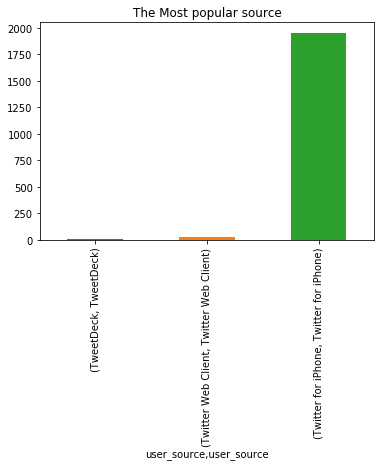

In [162]:
top=df_master.groupby('user_source')
top['user_source'].value_counts().plot(kind = 'bar'### Retweet vs.  Favourites)
plt.title('The Most popular source');

## II - Retweet vs.  Favourites

C:\Users\Amirat\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


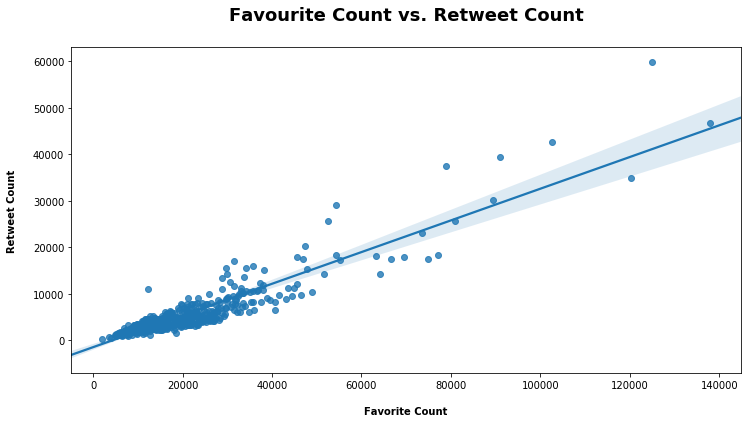

In [164]:
# scatter of favorite vs retweet count
fig, ax = plt.subplots(figsize=(12, 6))
sns.regplot( x="favorite_count", y="retweet_count", data=df_master, ax=ax)           
plt.title('Favourite Count vs. Retweet Count\n', fontsize=18, weight='bold')
plt.xlabel('\nFavorite Count', weight='bold')
plt.ylabel('Retweet Count\n', weight='bold');
plt.savefig('retweet-vs-favourite.png')

#### II. Most Popular Dog Names on the Account

I would like to find the most popular dog names. As rating has not anything to do with popularity, in this case, I will rate popularity by the number of tweets, assuming that the most popular dog names occur more times on the site.

The most often tweeted dognames are Charlie, Lucy, Oliver and Cooper. Other names such as Lola, Daisy and Bella are also qiet popular. This trend corresponds my personal experience as I also consider these names popular among dog owners.

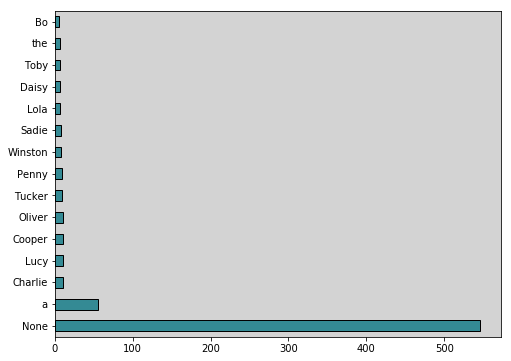

In [169]:
fig, ax = plt.subplots(figsize=(8,6))

names = df_master['name']
names.value_counts().head(15).plot(kind = 'barh', color = "#348A94", ax = ax, edgecolor = ['Black']*len(names))
ax.set_facecolor('#D3D3D3')
plt.show();

#### III. Dog Stages

I analyzed the specific "dog stages", excluding the missing values to make a pie chart about the proportions of the categories. The most often used stage is "pupper" with more than 65%, the second one is "doggo" (about 22%). The account owners use the words puppo and floofer in 10% of the cases alltogether.

(-1.288268191449591,
 1.2310305760057396,
 -1.2401381220397572,
 1.2110819987279693)

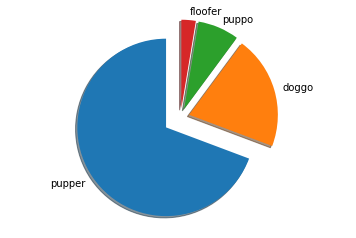

In [174]:
# Exclude the cases where the dog stage is missing.
dog_stage_count = list(df_master[df_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = df_master[df_master['dog_stage'] != "None"]['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1)

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal')